## Generated figures:
* S1H (random-permutation and circular-permutation shuffling tests for place cell classification)
* S1I (re-centering test for place cell classification)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from os import sys
sys.path.append('..')
import data_util
import plotting_util
import style

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = "none"

SHUFFLE_RESULTS_FILENAME = "../analysis_data/shuffle_results_with_day6.npz"
SHUFFLE_ROLL_RESULTS_FILENAME = "../analysis_data/shuffle_roll_results_with_day6.npz"
FIG_DIR = "../figures/"

In [7]:
"""
Uncomment this cell to run random-permutation shuffling tests
Note: results used in publication were saved in ../analysis_data
"""

"""
N_shuffles = 1000
shuffled_counts = np.zeros((7, N_shuffles))
for day_num in range(7):
    for shuffle_idx in range(N_shuffles):
        if shuffle_idx % 10 == 0:
            print("Day", day_num, "shuffle", shuffle_idx)
        shuffled_counts[day_num, shuffle_idx] \
            = data_util.get_pc_count_for_day(day_num, shuffle=True)
        
np.savez(SHUFFLE_RESULTS_FILENAME, shuffled_counts=shuffled_counts)
"""
pass

In [8]:
"""
Uncomment this cell to run circular-permutation ('rolled') shuffling tests
Note: results used in publication were saved in ../analysis_data
"""

"""
N_shuffles = 1000
shuffled_counts = np.zeros((7, N_shuffles))

for day_num in range(7):
    for shuffle_idx in range(N_shuffles):
        if shuffle_idx % 10 == 0:
            print("Day", day_num, "shuffle", shuffle_idx)
        shuffled_counts[day_num, shuffle_idx] \
            = data_util.get_pc_count_for_day(day_num, shuffle=True, roll=True)
        
np.savez(SHUFFLE_ROLL_RESULTS_FILENAME, shuffled_counts=shuffled_counts)
"""
pass

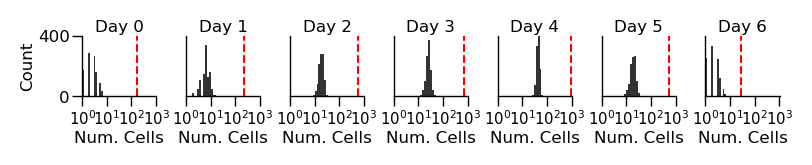

In [10]:
data = np.load(SHUFFLE_RESULTS_FILENAME)
shuffled_counts = data["shuffled_counts"]
pc_counts = np.array([data_util.get_pc_count_for_day(day_num)
                      for day_num in range(7)])

figsize = (4.5, .4)
xlim = (1, 1e3 + 25)
xticks = (1, 1e1, 1e2, 1e3)
ylim = (0, 400)
yticks = (0, 400)
titles = ["Day " + str(i) for i in range(7)]
bins = 40
ylabel = "Count"
#NOTE: we add +1 to shuffled_counts and pc_counts to avoid issues with zeros in the log-histogram
axes = plotting_util.plot_hists(figsize, shuffled_counts + 1, xlim, xticks, ylim, yticks,
                                titles, bins, ylabel, vlines=pc_counts + 1, xlabel=None)
for ax in axes:
    ax.set_xlabel("Num. Cells", **style.label_style)

plt.savefig(FIG_DIR + "shuffling_perm.svg", bbox_inches="tight")

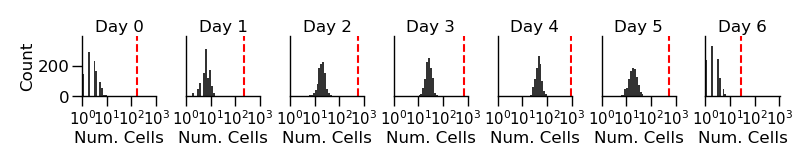

In [11]:
data = np.load(SHUFFLE_ROLL_RESULTS_FILENAME)
shuffled_counts = data["shuffled_counts"]
pc_counts = np.array([data_util.get_pc_count_for_day(day_num)
                      for day_num in range(7)])

figsize = (4.5, .4)
xlim = (1, 1e3 + 25)
xticks = (1, 1e1, 1e2, 1e3)
ylim = (0, 400)
yticks = (0, 200)
titles = ["Day " + str(i) for i in range(7)]
bins = 40
ylabel = "Count"
#NOTE: we add +1 to shuffled_counts and pc_counts to avoid issues with zeros in the log-histogram
axes = plotting_util.plot_hists(figsize, shuffled_counts + 1, xlim, xticks, ylim, yticks,
                                titles, bins, ylabel, vlines=pc_counts + 1, xlabel=None)
for ax in axes:
    ax.set_xlabel("Num. Cells", **style.label_style)
    
plt.savefig(FIG_DIR + "shuffling_roll.svg", bbox_inches="tight")

In [12]:
recentered_counts_10 = np.zeros(7)
recentered_counts_30 = np.zeros(7)
true_counts = np.array([data_util.get_pc_count_for_day(day_num) for day_num in range(7)])
for day_num in range(7):
    recentered_counts_10[day_num] = data_util.get_pc_count_for_day(day_num, shuffle=True, recenter=10)
    recentered_counts_30[day_num] = data_util.get_pc_count_for_day(day_num, shuffle=True, recenter=30)

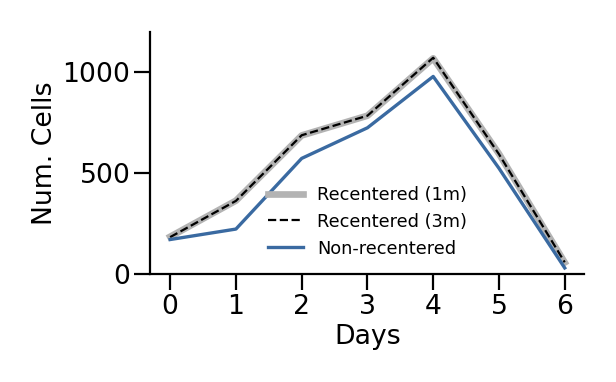

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.), dpi=320)
ax.plot(recentered_counts_10, c="0.7", lw=1.5, label="Recentered (1m)")
ax.plot(recentered_counts_30, c="black", ls="--", lw=.5, label="Recentered (3m)")
ax.plot(true_counts, c=style.pretty_blue, **style.line_style, label="Non-recentered")
ax.set_ylim([0, 1200])
ax.set_xticks(range(7))
ax.set_xlabel("Days", **style.label_style)
ax.set_ylabel("Num. Cells", **style.label_style)
ax.legend(frameon=False, fontsize=4)
plotting_util.prettyify_ax(ax)

plt.savefig(FIG_DIR + "recentering_test.svg", bbox_inches="tight")